┌ Warning: At t=0.09796386713598484, dt was forced below floating point epsilon 1.3877787807814457e-17, and step error estimate = 1.3304059640023171. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.037709377151362335, dt was forced below floating point epsilon 6.938893903907228e-18, and step error estimate = 21.57181127336052. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.6610559861760229, dt was forced below floating point epsilon 1.1102230246251565e-16, and step error estimate = 300.7448161906652. Aborting. There is either an 

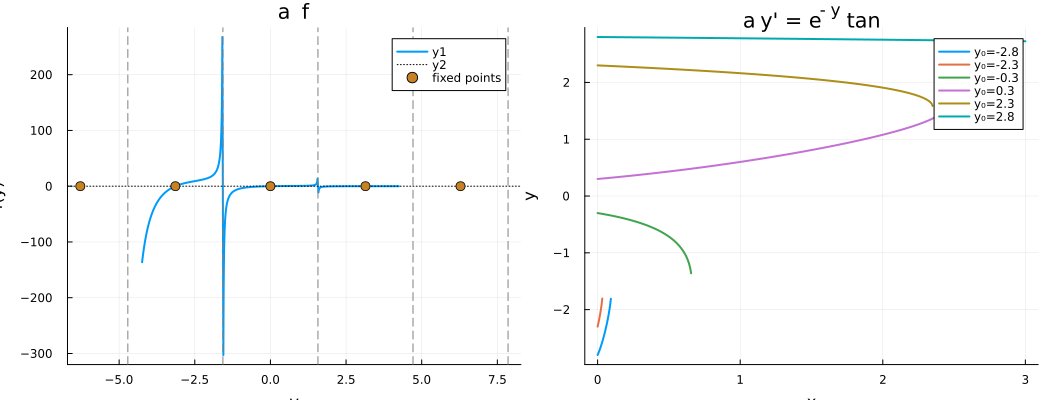

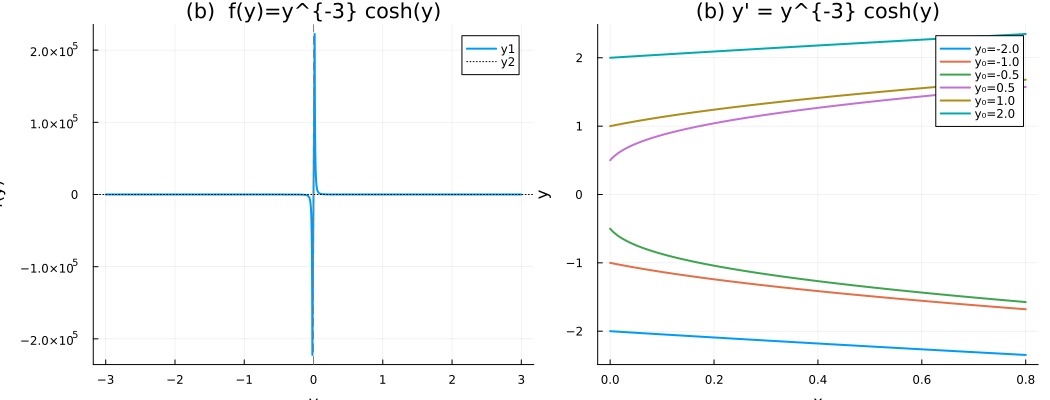

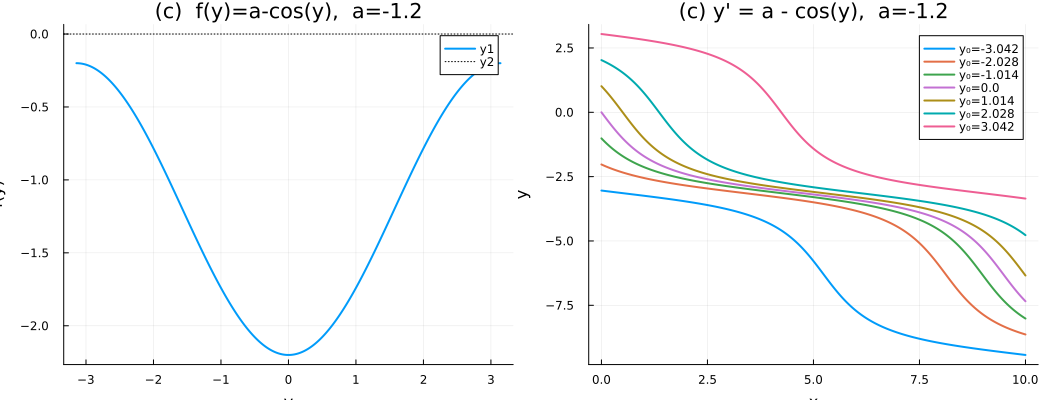

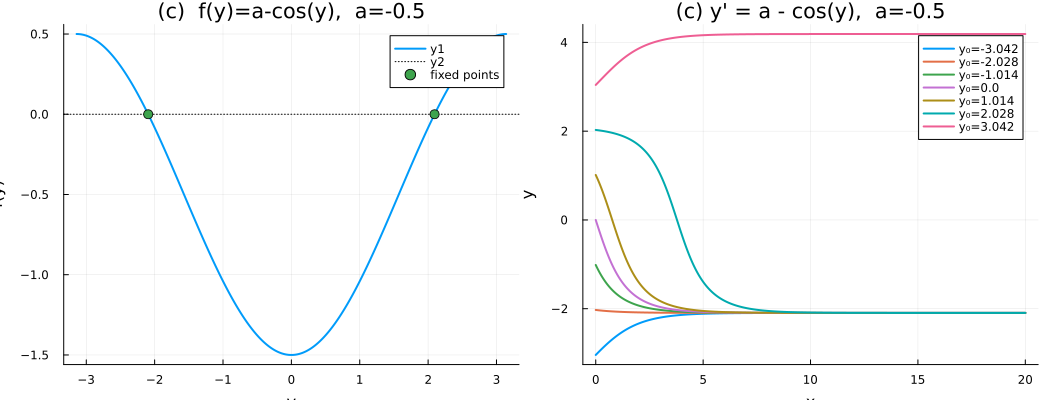

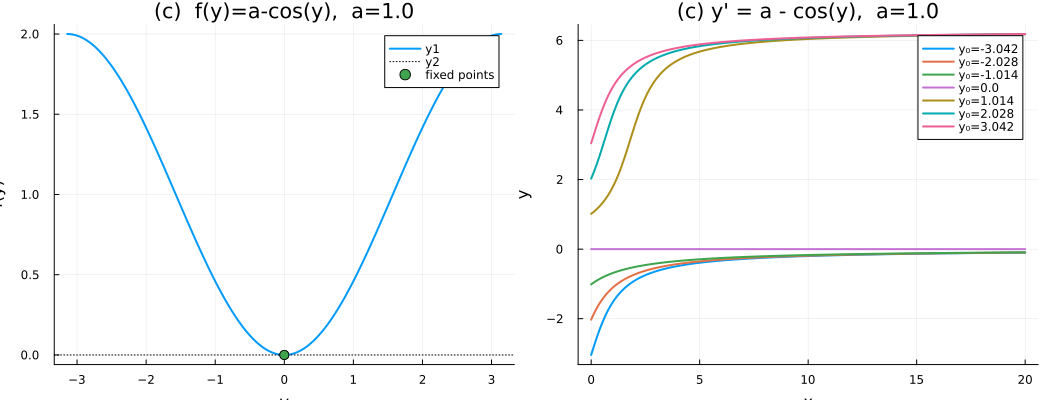

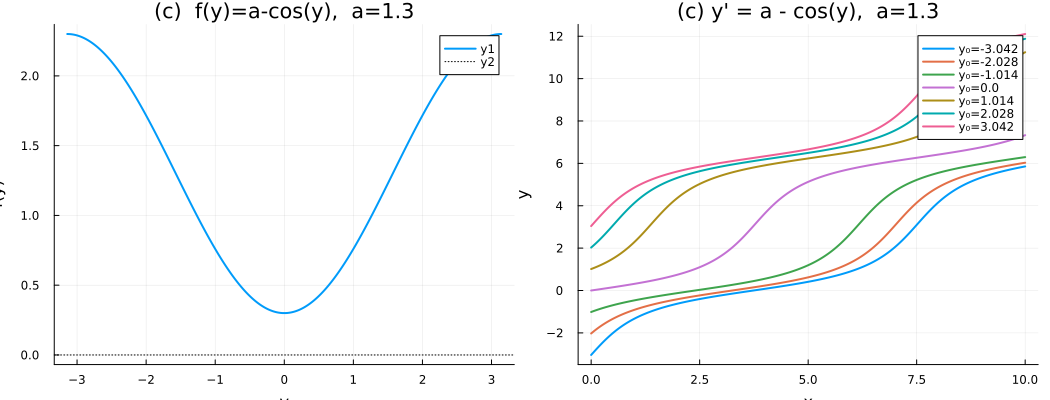

In [4]:
using DifferentialEquations, Plots

# ---------- generic helpers ----------
default(fmt=:png, size=(1050,400), legend=:topright, grid=true)

"""
    plot_graphical(f; yspan, xspan, ics, walls=[], zero_pts=[],
                   titleL="", titleR="")

Two-panel plot:
 1) f(y) vs y with walls and fixed points (zero_pts)
 2) y(x) trajectories from given initial conditions
"""
function plot_graphical(f; yspan=(-5.0,5.0), xspan=(0.0,6.0),
                        ics=[], walls=Float64[], zero_pts=Float64[],
                        titleL="f(y) vs y", titleR="Trajectories y(x)")
    yl, yr = yspan
    ys = collect(range(yl, yr, length=2000))
    mask = trues(length(ys))
    for w in walls
        mask .&= abs.(ys .- w) .> 0.015
    end
    ys_sample = ys[mask]
    fy = map(f, ys_sample)

    p1 = plot(ys_sample, fy, xlabel="y", ylabel="f(y)", lw=2, title=titleL)
    hline!(p1, [0], c=:black, ls=:dot)
    for w in walls
        vline!(p1, [w], c=:gray, ls=:dash, lab=nothing)
    end
    if !isempty(zero_pts)
        scatter!(p1, zero_pts, fill(0.0, length(zero_pts)); m=:circle, ms=5, lab="fixed points")
    end

    # out-of-place RHS because y is a scalar
    rhs(u,p,t) = f(u)
    p2 = plot(xlabel="x", ylabel="y", title=titleR)
    for y0 in ics
        prob = ODEProblem(rhs, y0, xspan)
        sol = solve(prob; reltol=1e-9, abstol=1e-9,
                    saveat=range(xspan[1], xspan[2], length=550))
        plot!(p2, sol.t, vec(sol.u), lab="y₀=$(round(y0, digits=3))", lw=2)
    end
    plot(p1, p2, layout=(1,2))
end

# ---------- (a)  y' = e^{-y} * tan(y) ----------
f_a(y) = exp(-y) * tan(y)
walls_a = [π/2 + k*π for k in -2:2]
zero_pts_a = [k*π for k in -2:2]
ics_a = [-2.8, -2.3, -0.3, 0.3, 2.3, 2.8]
pa = plot_graphical(f_a; yspan=(-2.7π/2, 2.7π/2), xspan=(0.0, 3.0), ics=ics_a,
                    walls=walls_a, zero_pts=zero_pts_a,
                    titleL="(a)  f(y)=e^{-y} tan(y)", titleR="(a) y' = e^{-y} tan(y)")

# ---------- (b)  y' = y^{-3} * cosh(y) ----------
f_b(y) = y == 0.0 ? Inf : y^(-3) * cosh(y)
walls_b = [0.0]
ics_b = [-2.0, -1.0, -0.5, 0.5, 1.0, 2.0]
pb = plot_graphical(f_b; yspan=(-3.0, 3.0), xspan=(0.0, 0.8), ics=ics_b,
                    walls=walls_b, zero_pts=Float64[],
                    titleL="(b)  f(y)=y^{-3} cosh(y)", titleR="(b) y' = y^{-3} cosh(y)")

# ---------- (c)  y' = a - cos(y) ----------
function make_c_plots(a; yspan=(-π, π), xspan=(0.0, 12.0))
    f_c(y) = a - cos(y)
    zero_pts = Float64[]
    if abs(a) ≤ 1
        z1 = [acos(a) + 2k*π for k in -1:1]
        z2 = [-acos(a) + 2k*π for k in -1:1]
        zero_pts = filter(y -> yspan[1] ≤ y ≤ yspan[2], sort!(vcat(z1, z2)))
    end
    ics = collect(range(yspan[1]+0.1, yspan[2]-0.1, length=7))
    plot_graphical(f_c; yspan=yspan, xspan=xspan, ics=ics, walls=Float64[],
                   zero_pts=zero_pts, titleL="(c)  f(y)=a-cos(y),  a=$(a)",
                   titleR="(c) y' = a - cos(y),  a=$(a)")
end

pc1 = make_c_plots(-1.2; yspan=(-π, π), xspan=(0.0, 10.0))
pc2 = make_c_plots(-0.5; yspan=(-π, π), xspan=(0.0, 20.0))
pc3 = make_c_plots(1.0;  yspan=(-π, π), xspan=(0.0, 20.0))
pc4 = make_c_plots(1.3;  yspan=(-π, π), xspan=(0.0, 10.0))

display(pa)
display(pb)
display(pc1); display(pc2); display(pc3); display(pc4)


┌ Warning: At t=0.09796386713598484, dt was forced below floating point epsilon 1.3877787807814457e-17, and step error estimate = 1.3304059640023171. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.037709377151362335, dt was forced below floating point epsilon 6.938893903907228e-18, and step error estimate = 21.57181127336052. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657
┌ Warning: At t=0.6610559861760229, dt was forced below floating point epsilon 1.1102230246251565e-16, and step error estimate = 300.7448161906652. Aborting. There is either an 

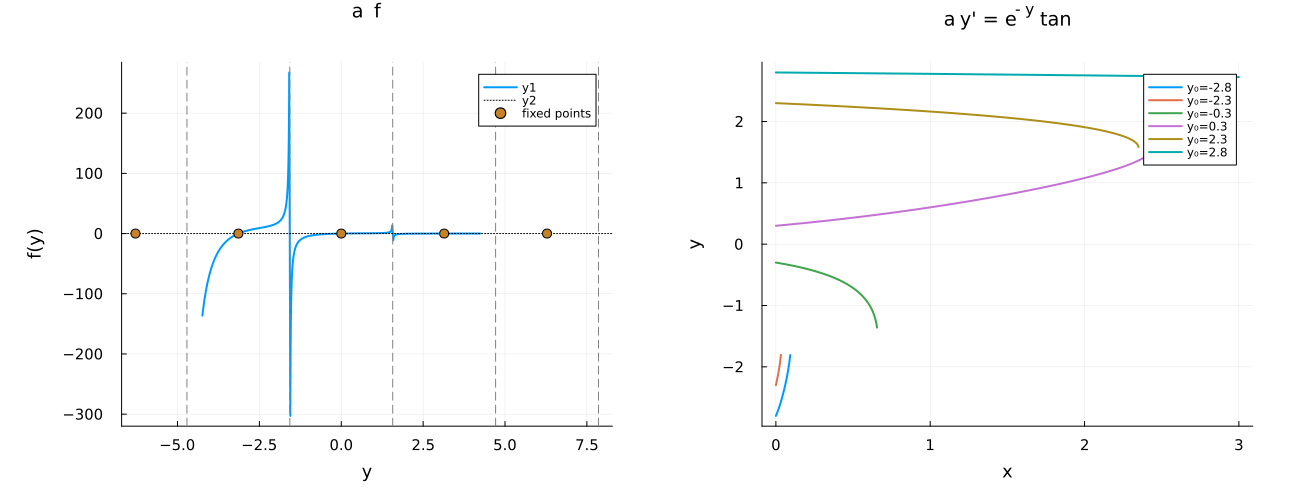

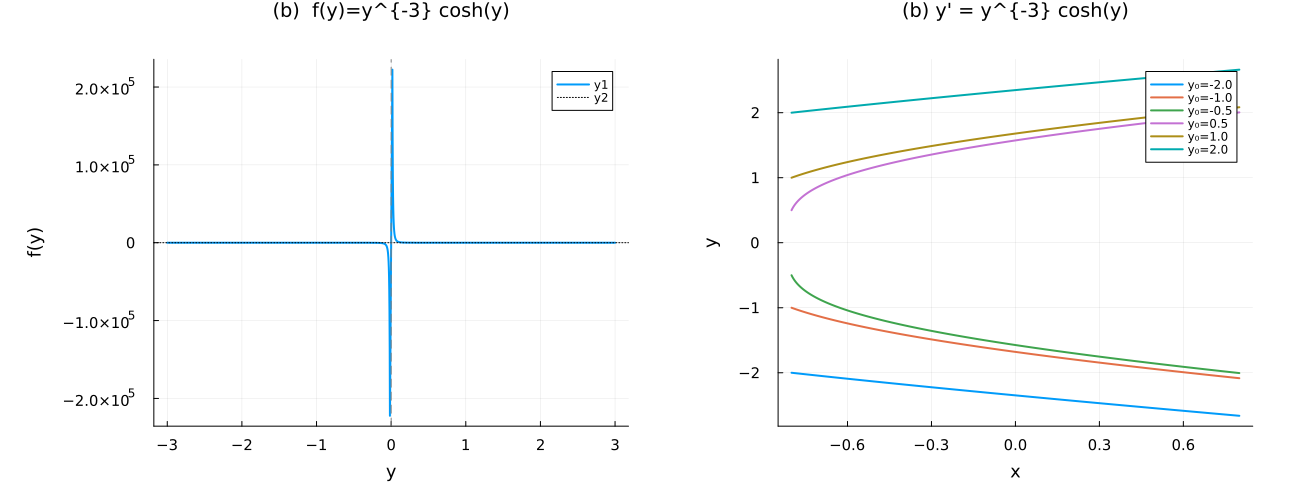

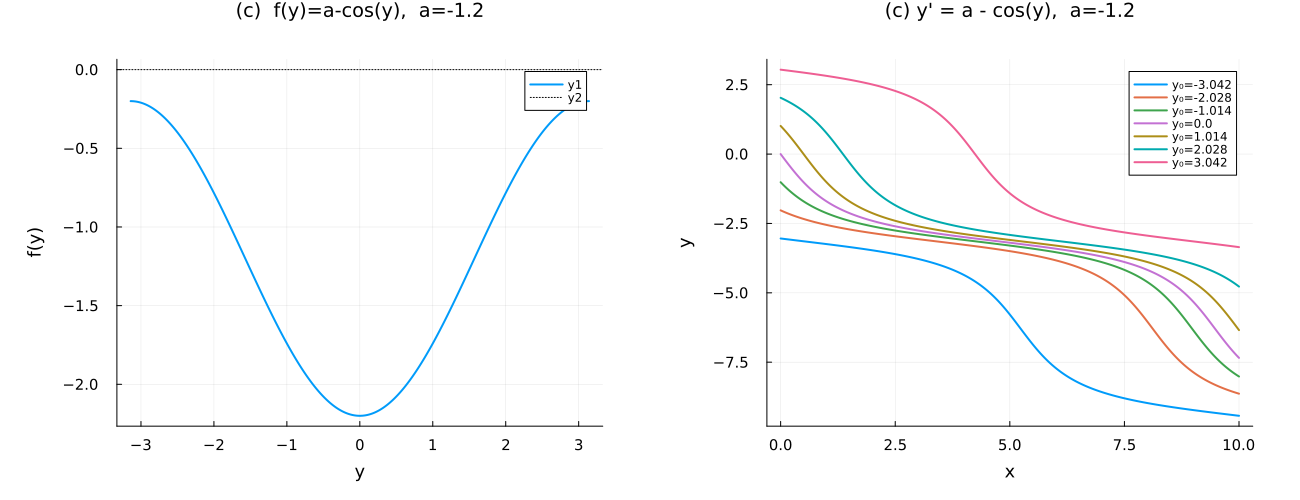

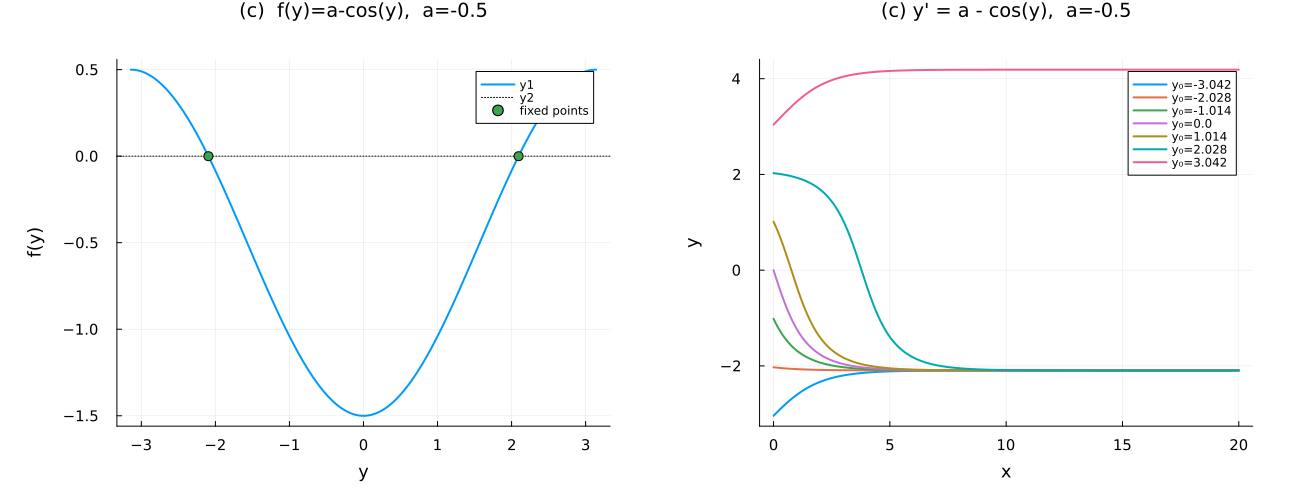

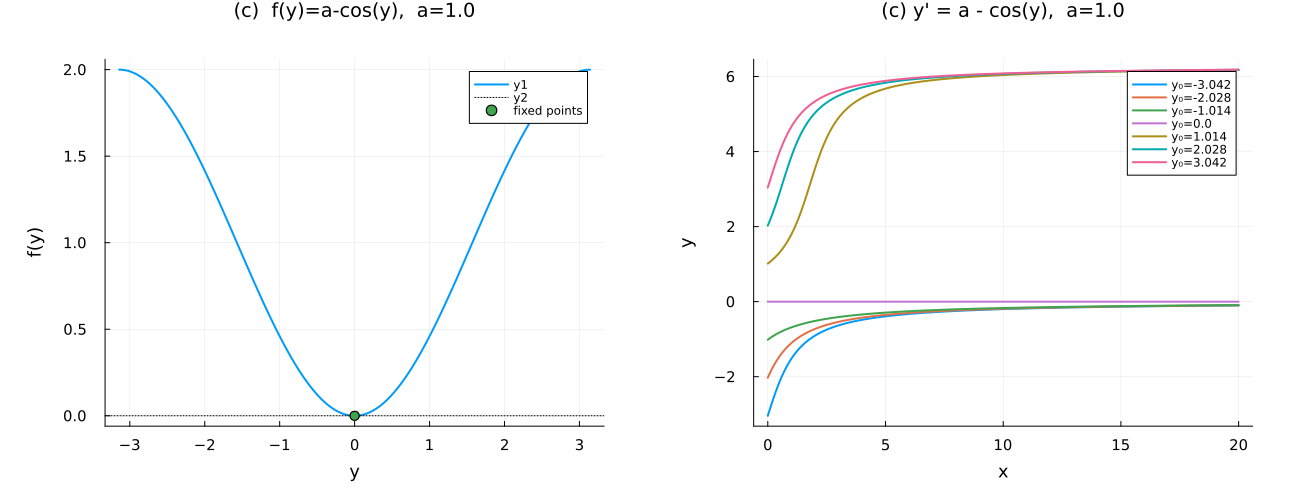

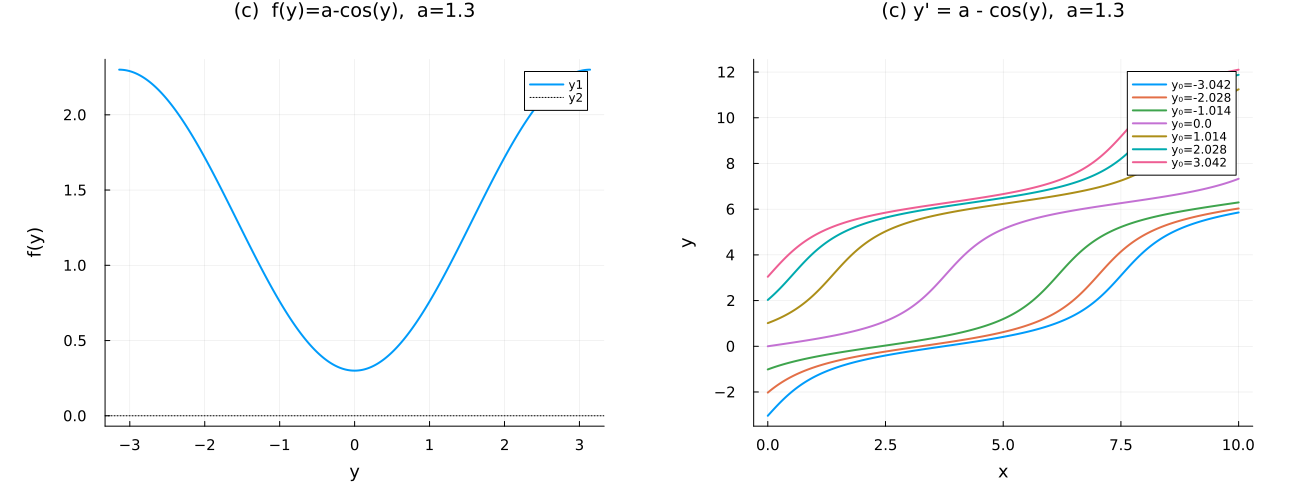

In [9]:
using DifferentialEquations, Plots, Measures

# Set global plot defaults — bigger size, font, and margins
default(
    fmt = :png,
    size = (1200, 450),        # wider and taller for both subplots
    legend = :topright,
    grid = true,
    tickfont = font(10),
    guidefont = font(12, "sans-serif"),
    titlefont = font(13, "sans-serif"),
    bottom_margin = 10mm,
    top_margin = 10mm,
    left_margin = 12mm,
    right_margin = 10mm,
)

"""
    plot_graphical(f; yspan, xspan, ics, walls=[], zero_pts=[],
                   titleL="", titleR="")

Two-panel plot:
 1) f(y) vs y with walls and fixed points (zero_pts)
 2) y(x) trajectories from given initial conditions
"""
function plot_graphical(f; yspan=(-5.0,5.0), xspan=(0.0,6.0),
                        ics=[], walls=Float64[], zero_pts=Float64[],
                        titleL="f(y) vs y", titleR="Trajectories y(x)")
    yl, yr = yspan
    ys = collect(range(yl, yr, length=2000))
    mask = trues(length(ys))
    for w in walls
        mask .&= abs.(ys .- w) .> 0.015
    end
    ys_sample = ys[mask]
    fy = map(f, ys_sample)

    p1 = plot(ys_sample, fy, xlabel="y", ylabel="f(y)", lw=2, title=titleL)
    hline!(p1, [0], c=:black, ls=:dot)
    for w in walls
        vline!(p1, [w], c=:gray, ls=:dash, lab=nothing)
    end
    if !isempty(zero_pts)
        scatter!(p1, zero_pts, fill(0.0, length(zero_pts)); m=:circle, ms=5, lab="fixed points")
    end

    rhs(u,p,t) = f(u)
    p2 = plot(xlabel="x", ylabel="y", title=titleR)
    for y0 in ics
        prob = ODEProblem(rhs, y0, xspan)
        sol = solve(prob; reltol=1e-9, abstol=1e-9,
                    saveat=range(xspan[1], xspan[2], length=550))
        plot!(p2, sol.t, vec(sol.u), lab="y₀=$(round(y0, digits=3))", lw=2)
    end

    # combined layout with spacing to avoid overlap
    plot(p1, p2, layout=(1,2), size=(1300, 500), margin=10mm)
end

# ---------- (a) ----------
f_a(y) = exp(-y) * tan(y)
walls_a = [π/2 + k*π for k in -2:2]
zero_pts_a = [k*π for k in -2:2]
ics_a = [-2.8, -2.3, -0.3, 0.3, 2.3, 2.8]
pa = plot_graphical(f_a; yspan=(-2.7π/2, 2.7π/2), xspan=(0.0, 3.0),
                    ics=ics_a, walls=walls_a, zero_pts=zero_pts_a,
                    titleL="(a)  f(y)=e^{-y} tan(y)", titleR="(a) y' = e^{-y} tan(y)")

# ---------- (b) ----------
f_b(y) = y == 0.0 ? Inf : y^(-3) * cosh(y)
walls_b = [0.0]
ics_b = [-2.0, -1.0, -0.5, 0.5, 1.0, 2.0]
pb = plot_graphical(f_b; yspan=(-3.0, 3.0), xspan=(-0.8, 0.8),
                    ics=ics_b, walls=walls_b, zero_pts=Float64[],
                    titleL="(b)  f(y)=y^{-3} cosh(y)", titleR="(b) y' = y^{-3} cosh(y)")

# ---------- (c) ----------
function make_c_plots(a; yspan=(-π, π), xspan=(0.0, 12.0))
    f_c(y) = a - cos(y)
    zero_pts = Float64[]
    if abs(a) ≤ 1
        z1 = [acos(a) + 2k*π for k in -1:1]
        z2 = [-acos(a) + 2k*π for k in -1:1]
        zero_pts = filter(y -> yspan[1] ≤ y ≤ yspan[2], sort!(vcat(z1, z2)))
    end
    ics = collect(range(yspan[1]+0.1, yspan[2]-0.1, length=7))
    plot_graphical(f_c; yspan=yspan, xspan=xspan, ics=ics, walls=Float64[],
                   zero_pts=zero_pts,
                   titleL="(c)  f(y)=a-cos(y),  a=$(a)",
                   titleR="(c) y' = a - cos(y),  a=$(a)")
end

pc1 = make_c_plots(-1.2; yspan=(-π, π), xspan=(0.0, 10.0))
pc2 = make_c_plots(-0.5; yspan=(-π, π), xspan=(0.0, 20.0))
pc3 = make_c_plots(1.0;  yspan=(-π, π), xspan=(0.0, 20.0))
pc4 = make_c_plots(1.3;  yspan=(-π, π), xspan=(0.0, 10.0))

# ---------- display ----------
display(pa)
display(pb)
display(pc1); display(pc2); display(pc3); display(pc4)
